In [1]:
import tensorflow as tf

data = tf.keras.datasets.cifar10

In [2]:
(x_train, y_train), (x_test_val, y_test_val) = data.load_data()

x_train.shape, x_test_val.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

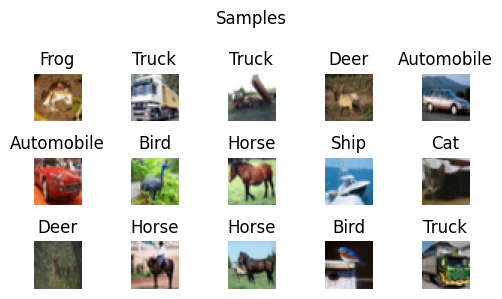

In [3]:
import matplotlib.pyplot as plt

label_classes = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

figure, axes = plt.subplots(3, 5, figsize = (5, 3))
axes = axes.flatten()

for i in range(len(axes)):
  class_index = y_train[i][0]
  class_name = label_classes[class_index]

  axes[i].set_title(class_name)
  axes[i].imshow(x_train[i])
  axes[i].axis("off")

figure.suptitle("Samples")
plt.tight_layout()
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

x_test, x_val, y_test, y_val = train_test_split(x_test_val, y_test_val, test_size = 0.5)

Normalize features

In [5]:
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

model = Sequential([
  Input(shape = (32, 32, 3)),
  # Conv2d layer values are experimental
  # first conv2d layer can learn edges
  Conv2D(filters = 32, kernel_size = (3, 3), activation = "relu"),
  # more conv2d layers can learn more advanced features
  Conv2D(32, (3, 3), activation = "relu"),
  MaxPooling2D(pool_size = (2, 2)),
  Dropout(0.25),
  Conv2D(64, (3, 3), activation = "relu"),
  Conv2D(64, (3, 3), activation = "relu"),
  MaxPooling2D(pool_size = (2, 2)),
  Dropout(0.25),
  # flat 2d pooling array into 1d array
  Flatten(),
  Dense(512, activation = "relu"),
  Dropout(0.5),
  # output
  Dense(10, activation = "softmax"),
])

model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [7]:
model_output = model.fit(x_train, y_train, batch_size = 128, epochs = 40, validation_data = (x_val, y_val))

Epoch 1/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 77s 186ms/step - accuracy: 0.2954 - loss: 1.8757 - val_accuracy: 0.5376 - val_loss: 1.3089
Epoch 2/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 69s 177ms/step - accuracy: 0.5331 - loss: 1.2966 - val_accuracy: 0.6098 - val_loss: 1.0987
Epoch 3/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 69s 177ms/step - accuracy: 0.6019 - loss: 1.1165 - val_accuracy: 0.6678 - val_loss: 0.9438
Epoch 4/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 69s 177ms/step - accuracy: 0.6476 - loss: 0.9939 - val_accuracy: 0.6916 - val_loss: 0.8778
Epoch 5/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 69s 176ms/step - accuracy: 0.6785 - loss: 0.9065 - val_accuracy: 0.7254 - val_loss: 0.8048
Epoch 6/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 69s 177ms/step - accuracy: 0.7106 - loss: 0.8289 - val_accuracy: 0.7336 - val_loss: 0.7599
Epoch 7/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 70s 178ms/step - accuracy: 0.7215 - loss: 0.7879 - val_accuracy: 0.7460 - val_loss: 0.7351
Epoch 8/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 70s 178ms/step - accuracy: 0.7413 - loss: 0

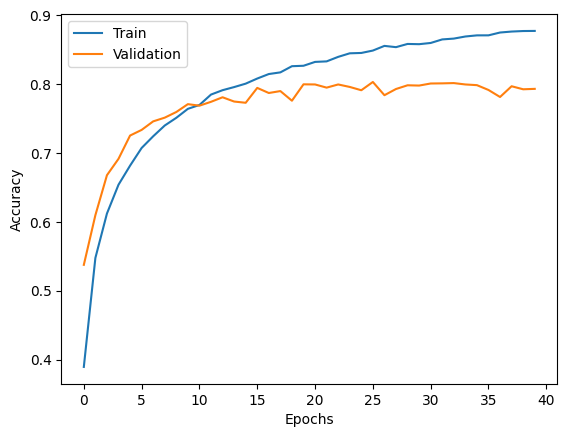

In [8]:
plt.plot(model_output.history["accuracy"], label = "Train")
plt.plot(model_output.history["val_accuracy"], label = "Validation")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [9]:
loss, accuracy = model.evaluate(x_test, y_test)

loss, accuracy

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7990 - loss: 0.6591


(0.6557992100715637, 0.7947999835014343)